# WeatherPy

Analysis

Observed trend 1: Cities with latitude around degree 0 (i.e., equator), have the highest temperature. As the latitude increases toward degree 90 (i.e., north pole), the temperature decreases.

Observed trend 2: The distribution of humidity versus latitude is approximately uniform, which indicates that most probably there is no strong correlation between humidity and latitude.
    
Observed trend 3: There is no significant difference in wind speed of cities around equator.

In [47]:
# Import Dependencies
import requests
import json
import openweathermapy.core as owm
from config import api_key
from pprint import pprint
from citipy import citipy
import seaborn as sns
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [48]:
# Getting the base URL and units
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build a URL
url = f"{base_url}appid={api_key}&units={units}&q="

# Generate Cities List

In [55]:
# Create an empty list to hold the city names
city_names=[]

# Generate random latitude and longitude values
lat_arr = random.sample(list(np.arange(-90, 90,0.1)), 1500)
lng_arr = random.sample(list(np.arange(-180, 180,0.1)), 1500)

# loop through each combination of lat and lon to get the city names from citipy
while len(city_names) < 600:
    for lat, lng  in zip(lat_arr, lng_arr):
        city = citipy.nearest_city(lat, lng)
        if city not in city_names:
            city_names.append(city.city_name)

# Perform API Calls

In [50]:
# Create empty lists to hold city names, cloudiness, country, date, humidity, lat, lng, max temperature and wind speed
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through each city in city names list to get the response from open weathermapy
row_count = 0
for city in city_names:
    print(f"Processing record {row_count} | {city}")
    row_count+=1
    response = requests.get(url+city)
    print(response.url)
    response = response.json()
    # Error handling to skip the cities that are not found in OWM
    try:   
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])            
    except:
        print(f"{city} is not found. Skipping....")
        continue

Processing record 0 | iracoubo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=iracoubo
Processing record 1 | east london
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=east%20london
Processing record 2 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=cidreira
Processing record 3 | nipawin
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=nipawin
Processing record 4 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=ushuaia
Processing record 5 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=cape%20town
Processing record 6 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=mys%20shmidta
mys shmidta is not found. Skipping....
Processing record 55 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=hilo
Processing record 56 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tiksi
Processing record 57 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=pacific%20grove
Processing record 58 | moranbah
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=moranbah
Processing record 59 | luganville
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=luganville
Processing record 60 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&u

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=coahuayana
Processing record 111 | kemi
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kemi
Processing record 112 | kandrian
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kandrian
Processing record 113 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=arraial%20do%20cabo
Processing record 114 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kodiak
Processing record 115 | jahrom
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=jahrom
jahrom is not found. Skipping....
Processing record 116 | oistins
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=i

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=lerwick
Processing record 165 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=lakes%20entrance
Processing record 166 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=nizhneyansk
nizhneyansk is not found. Skipping....
Processing record 167 | coroieni
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=coroieni
Processing record 168 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=la%20ronge
Processing record 169 | qingyuan
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=qingyuan
Processing record 170 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=pueblo%20nuevo
Processing record 220 | santa lucia
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=santa%20lucia
Processing record 221 | say
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=say
Processing record 222 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=katsuura
Processing record 223 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=qasigiannguit
Processing record 224 | haademeeste
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=haademeeste
haademeeste is not found. Skipping....
Processing record 225 | matinhos
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d6170

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tomatlan
Processing record 275 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=aswan
Processing record 276 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=bengkulu
bengkulu is not found. Skipping....
Processing record 277 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=santa%20isabel%20do%20rio%20negro
Processing record 278 | muskogee
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=muskogee
Processing record 279 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=half%20moon%20bay
Processing record 280 | kachiry
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=wakkanai
Processing record 330 | ola
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=ola
Processing record 331 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=santiago%20del%20estero
Processing record 332 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=cap%20malheureux
Processing record 333 | baracoa
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=baracoa
Processing record 334 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=nhulunbuy
Processing record 335 | kapoeta
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=caravelas
Processing record 386 | guadalajara
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=guadalajara
Processing record 387 | russell
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=russell
Processing record 388 | qixingtai
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=qixingtai
Processing record 389 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=olafsvik
olafsvik is not found. Skipping....
Processing record 390 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kirakira
Processing record 391 | bairnsdale
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=chicama
Processing record 441 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=deputatskiy
Processing record 442 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=puerto%20baquerizo%20moreno
Processing record 443 | aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=aleksandrov%20gay
Processing record 444 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kaeo
Processing record 445 | rudnogorsk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=rudnogorsk
Processing record 446 | kalanguy
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=babanusah
babanusah is not found. Skipping....
Processing record 497 | nuuk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=nuuk
Processing record 498 | san carlos del zulia
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=san%20carlos%20del%20zulia
Processing record 499 | ahvaz
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=ahvaz
Processing record 500 | slupsk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=slupsk
Processing record 501 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=quatre%20cocos
Processing record 502 | orocue
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=nakamura
Processing record 552 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=oranjemund
Processing record 553 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=hasaki
Processing record 554 | tikrit
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tikrit
Processing record 555 | tianpeng
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tianpeng
Processing record 556 | chaah
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=chaah
Processing record 557 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=alofi
Processing record 558 | sfantu ghe

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=inongo
Processing record 608 | bam
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=bam
Processing record 609 | bad reichenhall
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=bad%20reichenhall


In [52]:
city_data_pd = pd.DataFrame({"City":city_name,
            "Cloudiness":cloudiness,
             "Country": country,
             "Date": date,
             "Humidity": humidity,
             "Lat": lat,
             "Lng": lng,
             "Max_Temp": max_temp,
             "Wind_speed": wind_speed})

city_data_pd.to_csv("City Weather Data.csv")
city_data_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_speed
0,Iracoubo,92,GF,1521700810,80,5.48,-53.21,76.74,6.73
1,East London,75,ZA,1521698400,93,-33.02,27.91,62.60,5.82
2,Cidreira,0,BR,1521700840,95,-30.17,-50.22,56.04,3.04
3,Nipawin,1,CA,1521698400,92,53.36,-104.02,14.00,4.70
4,Ushuaia,40,AR,1521694800,50,-54.81,-68.31,57.20,9.17
5,Cape Town,0,ZA,1521698400,67,-33.93,18.42,62.60,3.36
6,Khatanga,56,RU,1521700841,84,71.98,102.47,-5.61,12.10
7,Longyearbyen,75,NO,1521697800,77,78.22,15.63,5.00,6.93
8,Saint-Pierre,48,FR,1521698400,92,48.95,4.24,30.20,6.93
9,Vaini,0,IN,1521700842,29,15.34,74.49,91.05,4.94


# Latitude vs Temperature Plot

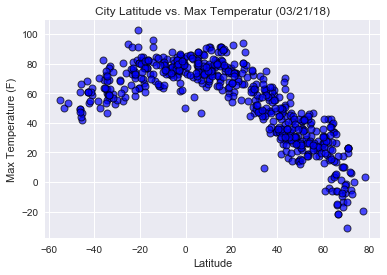

In [30]:
# Set the grey background
sns.set()

# Plot the scatter
plt.scatter(city_data_pd.Lat, city_data_pd.Max_Temp, color="Blue", edgecolors="black", alpha= 0.7, linewidths=1)

# Add Title, xlabel and ylabel
plt.title(f"City Latitude vs. Max Temperatur ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Display the plot
plt.show()

# Latitude vs. Humidity Plot

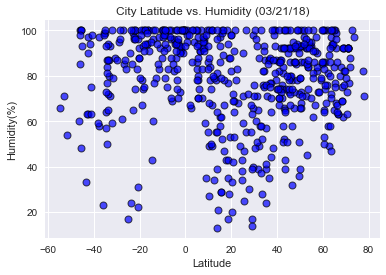

In [36]:
# Set the grey background
sns.set()

# The scatter plot
plt.scatter(city_data_pd.Lat,city_data_pd.Humidity, color="Blue",edgecolors="black", alpha=0.7, linewidths=1)

# Add title, xlabel and ylabel
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Display the plot
plt.show()

# Latitude vs. Cloudiness Plot

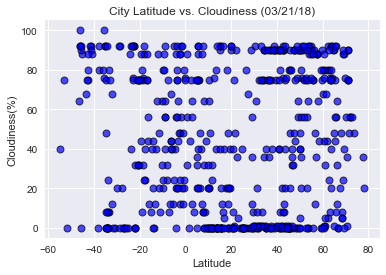

In [35]:
# Set the grey background
sns.set()

# The Scatter plot
plt.scatter(city_data_pd.Lat,city_data_pd.Cloudiness, color="Blue",edgecolors="black", alpha=0.7, linewidths=1)

# Add title, xlabel, ylabel
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Display the plot
plt.show()

# Latitude vs. Wind Speed Plot

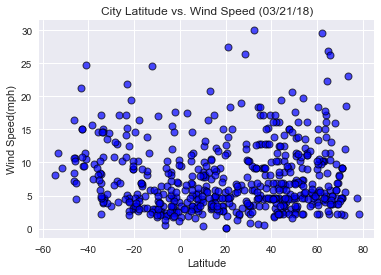

In [34]:
# Set the grey background
sns.set()

# The scatter plot
plt.scatter(city_data_pd.Lat, city_data_pd.Wind_speed, color="Blue",edgecolors="black", alpha=0.7, linewidths=1)

# Add title, xlabel, ylabel
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Display the plot
plt.show()